# Data Discretization

# Equal Width Discretization

In [1]:
#Performing equal width discretization on the price column in the diamonds dataset

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")


diamond_data = sns.load_dataset("diamonds")

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


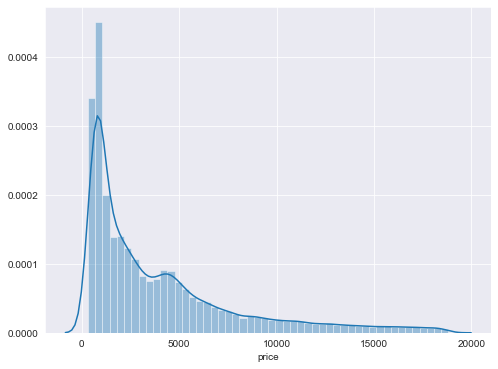

In [2]:
# Plotting a histogram for the price column 

sns.distplot(diamond_data["price"])

In [3]:
#The graph shows that the price column is positively skewed

# finding the total price range by subtracting min price from max price


price_range = diamond_data["price"].max() - diamond_data["price"].min()

print(price_range)

18497


In [4]:
#Creating the interval

lower_interval = int(np.floor(diamond_data["price"].min()))
upper_interval = int(np.ceil(diamond_data["price"].max()))


interval_length = int(np.round(price_range/10))

print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [5]:
# Creating the bins for the dataset


total_bins = [i for i in range(lower_interval,upper_interval+interval_length,interval_length)]

print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [6]:
#Creating labels for the dataset

bin_labels = ["Bin_no_"+str(i) for i in range(1,len(total_bins))]

print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [7]:
#Using the pandas cut method to convert continous column valuesi into numeric bin values


diamond_data["price_bins"] = pd.cut(x=diamond_data["price"],bins=total_bins,labels=bin_labels,include_lowest=True)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

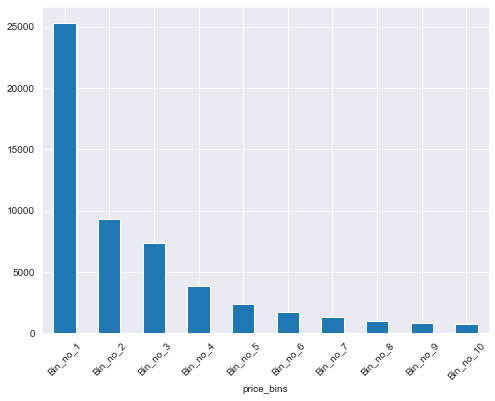

In [8]:
#Plotting a bar plot to show the frequency of prices in each bin

diamond_data.groupby("price_bins")["price"].count().plot.bar()
plt.xticks(rotation=45)

# Equal Frequency Discretization

In [9]:
#Loading the diamond dataset

diamond_data = sns.load_dataset("diamonds")

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
#Creating a dataframe that shows the actual price and quartile info

discretised_price,bins = pd.qcut(diamond_data["price"],10,labels=None,retbins=True,precision=3,duplicates="raise")
pd.concat([discretised_price,diamond_data["price"]],axis=1).head(10)

,price,price
0,"(325.999, 646.0]",326
1,"(325.999, 646.0]",326
2,"(325.999, 646.0]",327
3,"(325.999, 646.0]",334
4,"(325.999, 646.0]",335
5,"(325.999, 646.0]",336
6,"(325.999, 646.0]",336
7,"(325.999, 646.0]",337
8,"(325.999, 646.0]",337
9,"(325.999, 646.0]",338


In [11]:
print(bins)

[  326.    646.    837.   1087.   1698.   2401.   3465.   4662.   6301.2
  9821.  18823. ]


In [12]:
#Number of records per bin

discretised_price.value_counts()

(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: price, dtype: int64

In [13]:
# creating a dataframe containing the bins 

bin_labels = ["Bin_no_"+str(i) for i in range(1,11)]

print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [14]:
# performing the binning using pandas cut method

diamond_data["price_bins"] = pd.cut(x=diamond_data["price"],bins=bins,labels=bin_labels,include_lowest=True)

diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

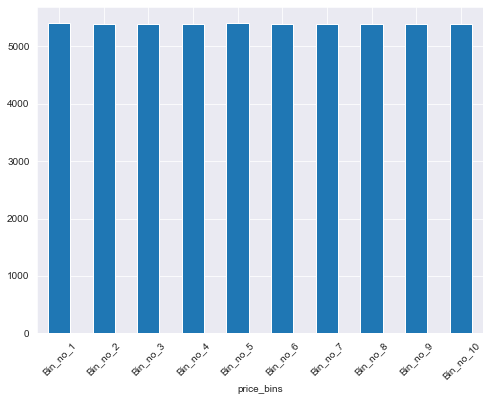

In [15]:
#PLotting a bar plot that shows the frequency of records per bin

diamond_data.groupby("price_bins")["price"].count().plot.bar()
plt.xticks(rotation=45)

# K-Means Discretization

In [16]:
#Using K-Means discretization to discretize the price column of the diamond dataset

from sklearn.preprocessing import KBinsDiscretizer


diamond_data = sns.load_dataset("diamonds")

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
discretization = KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="kmeans")
discretization.fit(diamond_data[["price"]])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [20]:
# Access the bins created via K-means clustering using the "bin_edges" attribute

intervals = discretization.bin_edges_.tolist()
print(intervals)

[array([  326.        ,  1493.84917743,  2885.73742232,  4320.85056658,
        5859.43951991,  7668.1310657 ,  9654.5661831 , 11758.64435923,
       13997.26275408, 16341.520841  , 18823.        ])]


In [21]:
# Creating a list of bins created via K-means discretization

intervals = [326.,1493.84917743,2885.73742232,4320.85056658,5859.43951991,7668.1310657,9654.5661831,11758.64435923,13997.26275408,16341.520841,18823.]

In [22]:
#Creating labels for each bin

bin_labels = ["Bin_no_"+str(i) for i in range(1,11)]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [23]:
#Using the cut method of the pandas to create a new column containing bins for the price column

diamond_data["price_bins"] = pd.cut(x=diamond_data["price"],bins=intervals,labels=bin_labels,include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

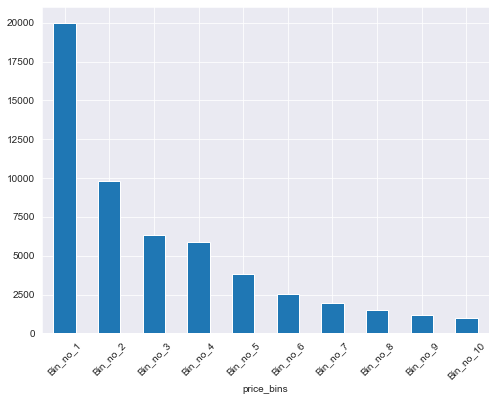

In [24]:
# Bar plot displaying the frequencies of record per bin 

diamond_data.groupby("price_bins")["price"].count().plot.bar()
plt.xticks(rotation=45)

# Decision Tree Discretization

In [25]:
from sklearn.tree import DecisionTreeClassifier

diamond_data = sns.load_dataset("diamonds")

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
# Creating the bins for the price column of the diamonds dataset based on the values in the cut column


tree_model = DecisionTreeClassifier(max_depth=3)

tree_model.fit(diamond_data["price"].to_frame(),diamond_data["cut"])

diamond_data["price_tree"] = tree_model.predict_proba(diamond_data["price"].to_frame())[:,1]

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_tree
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.127435
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.127435
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.127435
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.127435
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.127435


In [27]:
#Finding unique probability values in the price_tree column

diamond_data["price_tree"].unique()

array([0.12743549, 0.10543414, 0.0964318 , 0.11666667, 0.15124195,
       0.08576481, 0.05252665, 0.08874839])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

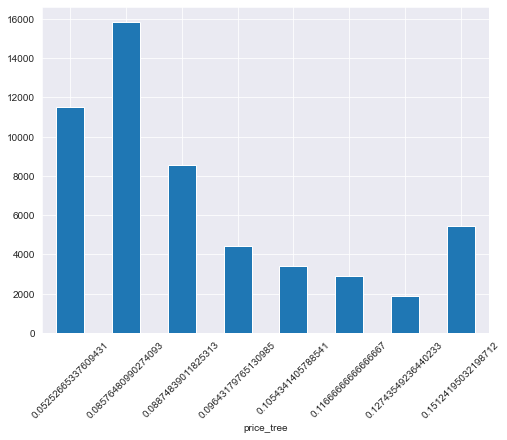

In [28]:
# Plotting the frequency of records per bin


diamond_data.groupby(["price_tree"])["price"].count().plot.bar()
plt.xticks(rotation=45)

# Custom Discretization

In [29]:
# Creating a customized discreization of a continous column by passing custom bin values. The following example will discretize
# the tip column of the Tips dataset


tips_data = sns.load_dataset("tips")

tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
#Finding the max and min values of the tip column

tips_data["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [31]:
# Creating 3 bins 
buckets = [0,3,7,10]

labels = ["0-3","3-7","7-10"]

tips_data["tip_bins"] = pd.cut(tips_data["tip"],bins=buckets,labels=labels,include_lowest=True)

tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bins
0,16.99,1.01,Female,No,Sun,Dinner,2,0-3
1,10.34,1.66,Male,No,Sun,Dinner,3,0-3
2,21.01,3.50,Male,No,Sun,Dinner,3,3-7
3,23.68,3.31,Male,No,Sun,Dinner,2,3-7
4,24.59,3.61,Female,No,Sun,Dinner,4,3-7


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

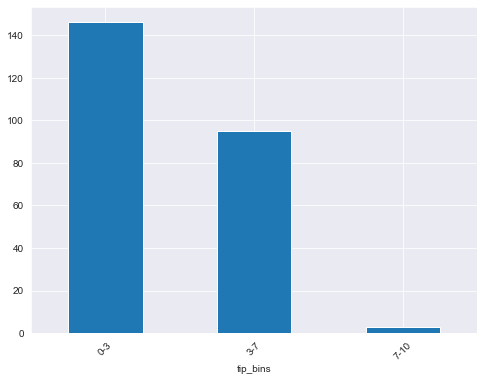

In [32]:
# Plotting the number of records per bin via a bar plot

tips_data.groupby("tip_bins")["tip"].count().plot.bar()

plt.xticks(rotation=45)